In [1]:
%matplotlib notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import os

import pandas as pd
import numpy as np
import math
from random import random

from IPython.display import display, clear_output

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

from PIL import Image

# from bokeh import palettes
# from bokeh.plotting import figure, show, output_file, ColumnDataSource
# from bokeh.tile_providers import STAMEN_TONER_BACKGROUND
# from bokeh.io import output_notebook, reset_output
# from bokeh.models import WMTSTileSource, HoverTool

# reset_output()
# output_notebook()

In [3]:
# Some general Matplotlib Settings

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
# Some Function definitions

def virtual_value(x, y, points, alpha):
    dist = np.zeros(len(points))
    for i,p in enumerate(points):
        dist[i] = math.hypot(x-p[0], y-p[1])
    
    nom = sum( [points[i][2] * (1/(dist[i]**alpha)) for i in range(len(points))] )
    denom = sum( [(1/(dist[i]**alpha)) for i in range(len(points))])
    
    return nom/denom     


def transparent_cmap(cmap, N=255):
    "Copy colormap and set alpha values"

    mycmap = cmap
    mycmap._init()
    mycmap._lut[:,-1] = np.linspace(0, 0.8, N+4)
    return mycmap


def load_experiment(experiment):
    # Loads latest per default
    experiment_path = "results/" + experiment + "/latest/"

    cases = os.listdir(experiment_path)
    for i, c in enumerate(cases):
        cases[i] = c.replace(".csv", "")
    cases[:] = [c for c in cases if c[0] != "."]

    ex_results = {}

    for c in cases:
        res = pd.read_csv(experiment_path+"/"+c+".csv")
        ex_results[c] = res

    return ex_results


def save_plot_to_experiment(fig_name, fig, experiment):
    savepath = "results/" + experiment + "/plots/"
    if not os.path.exists(savepath):
        os.makedirs(savepath)
    fig.savefig(savepath + fig_name, bbox_inches = 'tight', pad_inches = 0)

    
def build_raster(res, data_col="lambda", alpha=2):

    if res.shape[0] == 15:
        img = mpimg.imread('figures/15busmap/15-bus.png')
        f = pd.read_excel('figures/15busmap/15_bus_coord.xlsx', index='bus')
        img_xdim = 396
        img_ydim = 469
    elif res.shape[0] == 141:
        img = mpimg.imread('figures/141busmap/141-bus.png')
        f = pd.read_excel('figures/141busmap/141_bus_coord.xlsx', index='bus')
        img_xdim = 645
        img_ydim = 762
    else:
        print("No images for this bus")
        quit()

    buses = pd.merge(res, f, how='left', on=['bus'])

    raster_x, raster_y = np.mgrid[0:img_xdim, 0:img_ydim]
    raster = np.zeros((img_xdim, img_ydim))

    known_points_with_value = []
    known_points_coords = []
    for i, b in buses.iterrows():
        x = int(b.x)
        y = int(b.y)
        val = abs(b[data_col])
        known_points_with_value.append([x, y, val])
        known_points_coords.append([x, y])
        raster[x][y] = val

    for x in range(img_xdim):
        clear_output(wait=True)
        display(">>Raster calculation: {:.1f}%".format(x/img_xdim*100))
        for y in range(img_ydim):
            if [x, y] not in known_points_coords:
                raster[x][y] = virtual_value(x, y, known_points_with_value, alpha)
                
    print("Done")            
    return raster_x, raster_y, raster, img

## Load the experiment data

In [190]:
experiment = "experiment2"
results = load_experiment(experiment)
results["uncert"]

,objective,bus,gp,gq,voltage,alpha,lambda,pi,gamma,eta,delta_plus,delta_minus,mu_plus,mu_minus,voltvar,lambda_anc,rx_pi_i,rx_pi_a,r_sum_mu_d
0,42.152,1,-0.065,0.933,1.000,0.895,-50.000,-0.000,-31.673,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,2,0.000,0.000,0.900,0.000,-50.137,-16.440,0.000,-0.051,0.000,0.000,-0.000,-91.124,0.000,-50.000,-0.137,-0.000,0.137
2,0.000,3,0.000,0.000,0.960,0.000,-46.142,-10.730,0.000,-0.060,0.000,0.000,-0.000,-0.000,0.014,-50.137,-7.507,-11.503,-3.995
3,0.000,4,0.000,0.000,1.048,0.000,-39.879,-1.780,0.000,-0.073,0.000,0.000,-0.000,-0.000,0.015,-46.142,-1.245,-7.508,-6.262
4,0.000,5,0.000,0.000,1.054,0.000,-39.599,-1.379,0.000,-0.073,0.000,0.000,-0.000,-0.000,0.014,-39.879,-0.965,-1.245,-0.280
5,0.000,6,0.000,0.000,1.060,0.000,-39.342,-1.011,0.000,-0.073,0.000,0.000,-0.000,-0.000,0.013,-39.599,-0.705,-0.962,-0.257
6,0.000,7,0.754,-0.225,1.078,0.039,-38.635,-0.000,0.000,-0.074,-27.022,-0.000,-7.336,-0.000,0.009,-39.342,-0.000,-0.707,-0.707
7,0.000,8,0.000,0.000,1.070,0.000,-37.036,-2.284,0.000,-0.081,0.000,0.000,-15.289,-0.000,0.013,-38.635,-1.599,-0.000,-1.599
8,0.000,9,0.000,0.000,1.060,0.000,-38.635,-0.000,0.000,-0.076,0.000,0.000,-0.000,-0.000,0.013,-39.879,-0.000,-1.244,-1.244
9,0.000,10,0.000,0.000,1.062,0.000,-38.635,-0.000,0.000,-0.076,0.000,0.000,-0.000,-0.000,0.013,-38.635,-0.000,-0.000,-0.000


## Tables 

In [195]:
# Generation 
pd.options.display.float_format = '{:,.3f}'.format

genres = results.copy()

for k, df in genres.items():
    df = df[["bus", "gp", "alpha"]].loc[(df["gp"]>0) | (df["gq"]>0)]
    print(">>>> Case " + k)
    print(df.to_latex(index=False))
    print("")

>>>> Case gen_uncert
\begin{tabular}{rrr}
\toprule
 bus &     gp &  alpha \\
\midrule
   1 & -0.179 &  0.992 \\
   7 &  0.795 &  0.004 \\
  12 &  0.796 &  0.004 \\
\bottomrule
\end{tabular}


>>>> Case uncert
\begin{tabular}{rrr}
\toprule
 bus &     gp &  alpha \\
\midrule
   1 & -0.065 &  0.895 \\
   7 &  0.754 &  0.039 \\
  12 &  0.723 &  0.066 \\
\bottomrule
\end{tabular}


>>>> Case no_uncert
\begin{tabular}{rrr}
\toprule
 bus &     gp &  alpha \\
\midrule
   1 & -0.179 &      0 \\
   7 &  0.794 &      0 \\
  12 &  0.797 &      0 \\
\bottomrule
\end{tabular}




In [194]:
# All nodal data
pd.options.display.float_format = '{:,.3f}'.format

lmpres = results.copy()

for k, df in lmpres.items():
    df = df[["bus", "voltage", "lambda"]]
    df["lambda"] = df["lambda"] * -1
    df["bus"] = df["bus"] -1
    print(">>>> Case " + k)
    print(df.to_latex(index=False))
    print("")

/Users/Balu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Balu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


>>>> Case gen_uncert
\begin{tabular}{rrr}
\toprule
 bus &  voltage &  lambda \\
\midrule
   0 &    1.000 &  50.000 \\
   1 &    0.900 &  50.137 \\
   2 &    0.970 &  46.364 \\
   3 &    1.071 &  40.449 \\
   4 &    1.077 &  40.040 \\
   5 &    1.082 &  39.665 \\
   6 &    1.100 &  38.633 \\
   7 &    1.096 &  39.581 \\
   8 &    1.087 &  39.581 \\
   9 &    1.090 &  39.368 \\
  10 &    1.097 &  38.854 \\
  11 &    1.100 &  38.634 \\
  12 &    0.983 &  50.000 \\
  13 &    0.978 &  50.000 \\
  14 &    0.975 &  50.000 \\
\bottomrule
\end{tabular}


>>>> Case uncert
\begin{tabular}{rrr}
\toprule
 bus &  voltage &  lambda \\
\midrule
   0 &    1.000 &  50.000 \\
   1 &    0.900 &  50.137 \\
   2 &    0.960 &  46.142 \\
   3 &    1.048 &  39.879 \\
   4 &    1.054 &  39.599 \\
   5 &    1.060 &  39.342 \\
   6 &    1.078 &  38.635 \\
   7 &    1.070 &  37.036 \\
   8 &    1.060 &  38.635 \\
   9 &    1.062 &  38.635 \\
  10 &    1.067 &  38.635 \\
  11 &    1.069 &  38.635 \\
  12 &    0.983

In [187]:
# Dual variables and decomposition

pd.options.display.float_format = '{:,.3f}'.format

decomp = results.copy()

for k, df in decomp.items():
    df = df[["bus", "lambda", "lambda_anc", "rx_pi_i", "rx_pi_a"]]
    for c in ["lambda", "lambda_anc", "rx_pi_i", "rx_pi_a"]:
        df.loc[:,c] = df.loc[:,c] * -1
    df.loc[:,"bus"] = df.loc[:,"bus"] -1     
        
    print(">>>> Case " + k)
    print(df.to_latex(index=False))
    print("")



/Users/Balu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


>>>> Case gen_uncert
\begin{tabular}{rrrrr}
\toprule
 bus &  lambda &  lambda\_anc &  rx\_pi\_i &  rx\_pi\_a \\
\midrule
   0 &  50.000 &      -0.000 &   -0.000 &   -0.000 \\
   1 &  50.137 &      50.000 &    0.137 &   -0.000 \\
   2 &  46.364 &      50.137 &    7.732 &   11.505 \\
   3 &  40.449 &      46.364 &    1.817 &    7.732 \\
   4 &  40.040 &      40.449 &    1.408 &    1.817 \\
   5 &  39.665 &      40.040 &    1.029 &    1.403 \\
   6 &  38.633 &      39.665 &    0.000 &    1.032 \\
   7 &  39.581 &      39.581 &    0.950 &    0.950 \\
   8 &  39.581 &      40.449 &    0.948 &    1.816 \\
   9 &  39.368 &      39.581 &    0.735 &    0.948 \\
  10 &  38.854 &      39.368 &    0.220 &    0.734 \\
  11 &  38.634 &      38.854 &    0.000 &    0.220 \\
  12 &  50.000 &      50.000 &   -0.000 &   -0.000 \\
  13 &  50.000 &      50.000 &   -0.000 &   -0.000 \\
  14 &  50.000 &      50.000 &   -0.000 &   -0.000 \\
\bottomrule
\end{tabular}


>>>> Case uncert
\begin{tabular}{rrrrr}
\

In [188]:
# Influence of voltage constraints

pd.options.display.float_format = '{:,.3f}'.format

decomp = results.copy()

for k, df in decomp.items():
    df = df[["bus", "lambda", "mu_plus", "mu_minus", "lambda_anc", "r_sum_mu_d"]]
    for c in ["lambda", "mu_plus", "mu_minus", "lambda_anc", "r_sum_mu_d"]:
        df.loc[:,c] = df.loc[:,c] * -1
    df.loc[:,"bus"] = df.loc[:,"bus"] -1     
        
    print(">>>> Case " + k)
    print(df.to_latex(index=False))
    print("")


/Users/Balu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


>>>> Case gen_uncert
\begin{tabular}{rrrrrr}
\toprule
 bus &  lambda &  mu\_plus &  mu\_minus &  lambda\_anc &  r\_sum\_mu\_d \\
\midrule
   0 &  50.000 &   -0.000 &    -0.000 &      -0.000 &      -0.000 \\
   1 &  50.137 &    0.000 &    89.882 &      50.000 &      -0.137 \\
   2 &  46.364 &    0.000 &     0.000 &      50.137 &       3.774 \\
   3 &  40.449 &    0.000 &     0.000 &      46.364 &       5.915 \\
   4 &  40.040 &    0.000 &     0.000 &      40.449 &       0.409 \\
   5 &  39.665 &    0.000 &     0.000 &      40.040 &       0.375 \\
   6 &  38.633 &   10.706 &     0.000 &      39.665 &       1.032 \\
   7 &  39.581 &    0.000 &     0.000 &      39.581 &       0.000 \\
   8 &  39.581 &    0.000 &     0.000 &      40.449 &       0.868 \\
   9 &  39.368 &    0.000 &     0.000 &      39.581 &       0.213 \\
  10 &  38.854 &    0.000 &     0.000 &      39.368 &       0.514 \\
  11 &  38.634 &   10.662 &     0.000 &      38.854 &       0.220 \\
  12 &  50.000 &    0.000 &     0.

## All the fun heatmaps

- Note on colormaps: although `RdYlBu_r` is much nicer for the purpose, I choose `YlOrBr` as it will preserve the info in black/white

In [170]:
raster_x, raster_y, raster, img = build_raster(results['no_uncert'], data_col="voltage")

'>>Raster calculation: 99.7%'

Done


<IPython.core.display.Javascript object>


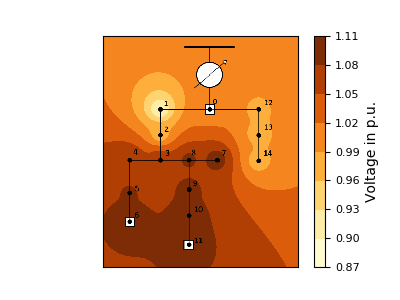

In [172]:
# Heatmap for deterministic case

fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(4, 3)

cf = axes.contourf(raster_x, raster_y, raster, alpha=1, cmap=plt.cm.YlOrBr, zorder=1)
axes.imshow(img, 'gray', interpolation='none', zorder=2)
cbar = plt.colorbar(cf)
cbar.set_label(r'Voltage in p.u.')


axes.set_yticks([])
axes.set_xticks([])
plt.show()

In [37]:
# Heatmaps for no_uncert and uncert next to each other

res_a = results['no_uncert']
res_b = results['uncert']

ra_x, ra_y, ra, ima = build_raster(res_a)
rb_x, rb_y, rb, imb = build_raster(res_b)

'>>Raster calculation: 99.7%'

Done


<IPython.core.display.Javascript object>


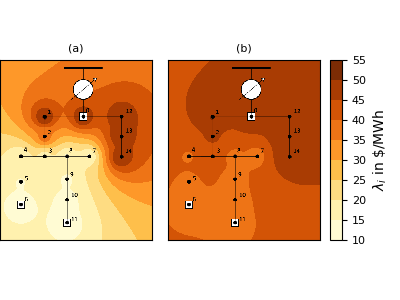

In [160]:
vmax = 55
vmin = 10
levels = np.linspace(10,55, 10)

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(4, 3)

cfa = axes[0].contourf(ra_x, ra_y, ra, alpha=1, cmap=plt.cm.YlOrBr, levels=levels,vmax=vmax,vmin=vmin, zorder=1)
axes[0].imshow(ima, 'gray', interpolation='none', zorder=2)
axes[0].set_yticks([])
axes[0].set_xticks([])
axes[0].set_title("(a)")

cfb = axes[1].contourf(rb_x, rb_y, rb, alpha=1, cmap=plt.cm.YlOrBr, levels=levels,vmax=vmax,vmin=vmin, zorder=1)
axes[1].imshow(imb, 'gray', interpolation='none', zorder=2)
axes[1].set_yticks([])
axes[1].set_xticks([])
axes[1].set_title("(b)")

fig.subplots_adjust(top = 1, bottom = 0, right = 0.8, left = 0, 
            hspace = 0, wspace = 0.1)


# fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.825, 0.2, 0.03, 0.6])
cbar = fig.colorbar(cfb, cax=cbar_ax)
cbar.set_label(r'$\lambda_i$ in \$/MWh')



In [161]:
save_plot_to_experiment("det_and_uncert_hm.pdf", fig, experiment)

# Prototyping Space

In [34]:

fig = plt.figure(figsize=(8.0,6.0))
ax1 = fig.add_subplot(221)    

vmax=30
vmin=0
levels = np.linspace(vmin,vmax,100)

z_contourR = ax1.contourf(xlist,ylist,z_matrixR,levels=levels,vmax=vmax,vmin=vmin)
plt.xlabel('x')
plt.ylabel('y')
plt.title('real')
cbarR = plt.colorbar(z_contourR)

ax2 = fig.add_subplot(222)
z_contourI = ax2.contourf(xlist,ylist,z_matrixI,levels=levels,vmax=vmax,vmin=vmin)
plt.xlabel('x')
plt.ylabel('y')
plt.title('imaginary')
cbarI = plt.colorbar(z_contourI)

plt.tight_layout()
plt.show()

'>>Raster calculation: 99.8%'

In [31]:
img = mpimg.imread('figures/141busmap/141-bus.png')

In [82]:
plt.savefig('yury/lmps_c1_no_uncert.eps')

In [71]:
raster_c2_uncert = raster

<IPython.core.display.Javascript object>


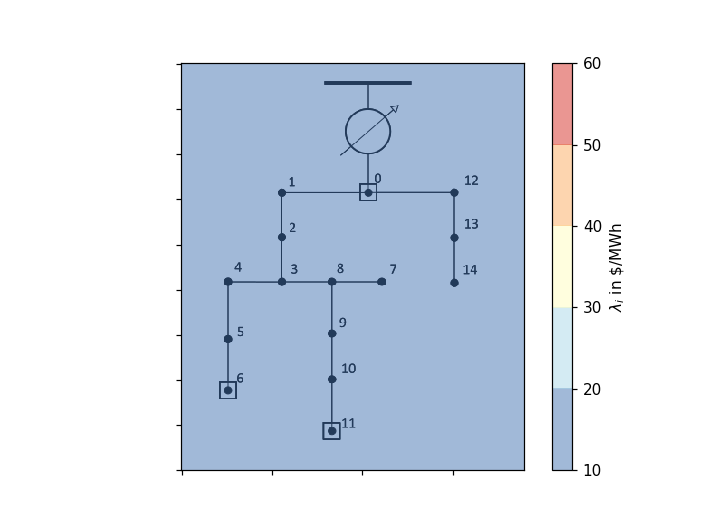

In [77]:
levels = np.linspace(10, 60, 6)
fig, ax = plt.subplots(1, 1)

cf = ax.contourf(raster_x, raster_y, raster_c2_no_uncert, alpha=0.5, cmap=plt.cm.RdYlBu_r, levels = levels)
ax.imshow(img, 'gray', interpolation='none')
cbar = plt.colorbar(cf)
cbar.set_label(r'$\lambda_i$ in \$/MWh')


ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

In [78]:
plt.savefig('yury/dlmps_c2_no_uncert.eps')

<IPython.core.display.Javascript object>


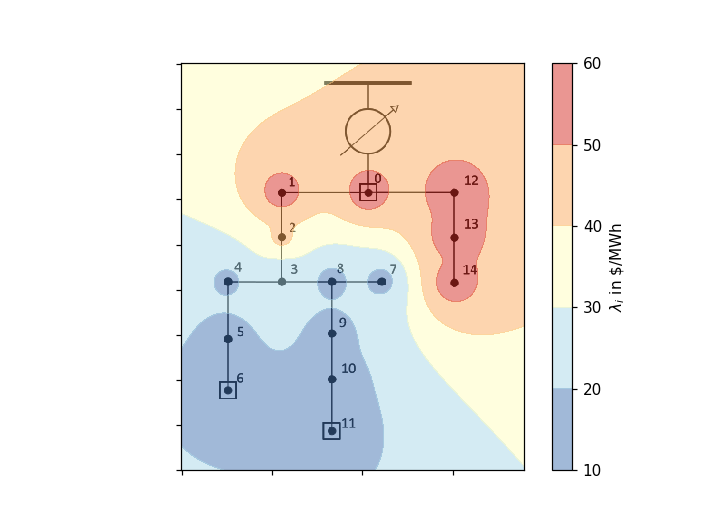

In [75]:
# levels = np.linspace(0, 0.014, 8)
fig, ax = plt.subplots(1, 1)

cf = ax.contourf(raster_x, raster_y, raster_c2_uncert, alpha=0.5, cmap=plt.cm.RdYlBu_r, levels = levels)
ax.imshow(img, 'gray', interpolation='none')
cbar = plt.colorbar(cf)
cbar.set_label(r'$\lambda_i$ in \$/MWh')


ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

In [76]:
plt.savefig('yury/dlmps_c2_uncert.eps')

In [33]:
res

,objective,bus,gp,gq,voltage,alpha,lambda,pi,gamma,eta,delta_plus,delta_minus,mu_plus,mu_minus,voltvar
0,20.032687,1,-0.145727,0.936462,1.000000,0,-38.326708,0.000000e+00,0.0,0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0
1,0.000000,2,0.000000,0.000000,0.900000,0,-38.630517,-3.645703e+01,0.0,0,0.000000,0.000000e+00,-3.470245e-07,-1.992788e+02,0
2,0.000000,3,0.000000,0.000000,0.967086,0,-30.264179,-2.449970e+01,0.0,0,0.000000,0.000000e+00,-5.179927e-07,-1.140307e-06,0
3,0.000000,4,0.000000,0.000000,1.063758,0,-17.150914,-5.758346e+00,0.0,0,0.000000,0.000000e+00,-2.012951e-06,-4.311353e-07,0
4,0.000000,5,0.000000,0.000000,1.071310,0,-16.244200,-4.462361e+00,0.0,0,0.000000,0.000000e+00,-2.588903e-06,-4.099399e-07,0
5,0.000000,6,0.000000,0.000000,1.078537,0,-15.413441,-3.270816e+00,0.0,0,0.000000,0.000000e+00,-3.563620e-06,-3.913093e-07,0
6,0.000000,7,0.975453,-0.322255,1.100000,0,-13.125294,-6.612641e-07,0.0,0,-0.000014,-5.180678e-08,-2.373597e+01,-3.438077e-07,0
7,0.000000,8,0.000000,0.000000,1.066147,0,-15.226737,-3.006820e+00,0.0,0,0.000000,0.000000e+00,-0.000000e+00,-4.234192e-07,0
8,0.000000,9,0.000000,0.000000,1.075895,0,-15.226737,-3.006820e+00,0.0,0,0.000000,0.000000e+00,-3.317415e-06,-0.000000e+00,0
9,0.000000,10,0.000000,0.000000,1.081000,0,-14.753967,-2.330758e+00,0.0,0,0.000000,0.000000e+00,-4.503029e-06,-0.000000e+00,0
